### Import related libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

### Read the gold price data

In [ ]:
df = pd.read_csv('./Data/xauusd1.csv')
x = "the new dataset column"
print(x)

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,1155.199951,1160.800049,1146.500000,1160.400024,1160.400024,52
1,2017-01-04,1156.300049,1165.000000,1156.300049,1163.800049,1163.800049,36
2,2017-01-05,1172.000000,1183.300049,1171.500000,1179.699951,1179.699951,500
3,2017-01-06,1176.500000,1176.500000,1171.900024,1171.900024,1171.900024,16
4,2017-01-09,1173.900024,1183.599976,1173.000000,1183.500000,1183.500000,62


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1760 non-null   object 
 1   Open       1760 non-null   float64
 2   High       1760 non-null   float64
 3   Low        1760 non-null   float64
 4   Close      1760 non-null   float64
 5   Adj Close  1760 non-null   float64
 6   Volume     1760 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.4+ KB


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,1604.835398,1612.048865,1597.728750,1604.927215,1604.927215,5405.205114
std,278.669170,281.032243,276.462716,278.658960,278.658960,30580.104807
min,1155.199951,1160.800049,1146.500000,1160.400024,1160.400024,0.000000
25%,1295.250031,1300.325012,1291.875031,1296.775024,1296.775024,45.000000
50%,1704.349976,1714.850037,1694.599976,1704.900024,1704.900024,179.500000
75%,1845.724976,1855.724976,1838.324951,1847.724976,1847.724976,564.750000
max,2081.600098,2130.199951,2066.500000,2081.899902,2081.899902,386334.000000


### Check outliers with Z score

In [8]:
def check_outlier(data): 
    mean = np.mean(data)
    std = np.std(data)
    threshold = 3
    outliers = []
    for x in data:
        z_score = (x - mean) / std
        if abs(z_score) > threshold:
            outliers.append(x)
    # print(f'Outliers: {outliers}')
    return outliers

print('Outliers Data')
print(f"Open: {check_outlier(df['Open'].values.tolist())}")
print(f"High: {check_outlier(df['High'].values.tolist())}")
print(f"Low: {check_outlier(df['Low'].values.tolist())}")
print(f"Volume: {check_outlier(df['Volume'].values.tolist())}")
print(f"Adj Close: {check_outlier(df['Adj Close'].values.tolist())}")

Outliers Data
Open: []
High: []
Low: []
Volume: [234352, 190678, 271457, 129819, 220309, 275442, 280546, 290889, 386334, 254428, 247168, 213607, 206263, 189694, 224267, 346362, 251274, 100638, 137416, 209835, 205754, 195540, 135457, 170526, 209783, 186800, 196036, 128051, 123355, 144865, 132767, 150902, 166036, 194253, 174665]
Adj Close: []


In [9]:
columns = ['Open', 'High', 'Low', 'Volume']
X = df[columns].values
X[:5]

array([[1155.19995117, 1160.80004883, 1146.5       ,   52.        ],
       [1156.30004883, 1165.        , 1156.30004883,   36.        ],
       [1172.        , 1183.30004883, 1171.5       ,  500.        ],
       [1176.5       , 1176.5       , 1171.90002441,   16.        ],
       [1173.90002441, 1183.59997559, 1173.        ,   62.        ]])

In [10]:
column = ['Adj Close']
y = df[column].values
y[:5]

array([[1160.40002441],
       [1163.80004883],
       [1179.69995117],
       [1171.90002441],
       [1183.5       ]])

In [11]:
training_data_len = int(np.ceil(len(y) * .70))
print(f'Training data length: {training_data_len}')

Training data length: 1232


### Feature scaling

In [12]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(y)
scaled_data

array([[-0.98829304],
       [-0.98212183],
       [-0.95326276],
       ...,
       [ 0.68427246],
       [ 0.66975208],
       [ 0.64887904]])

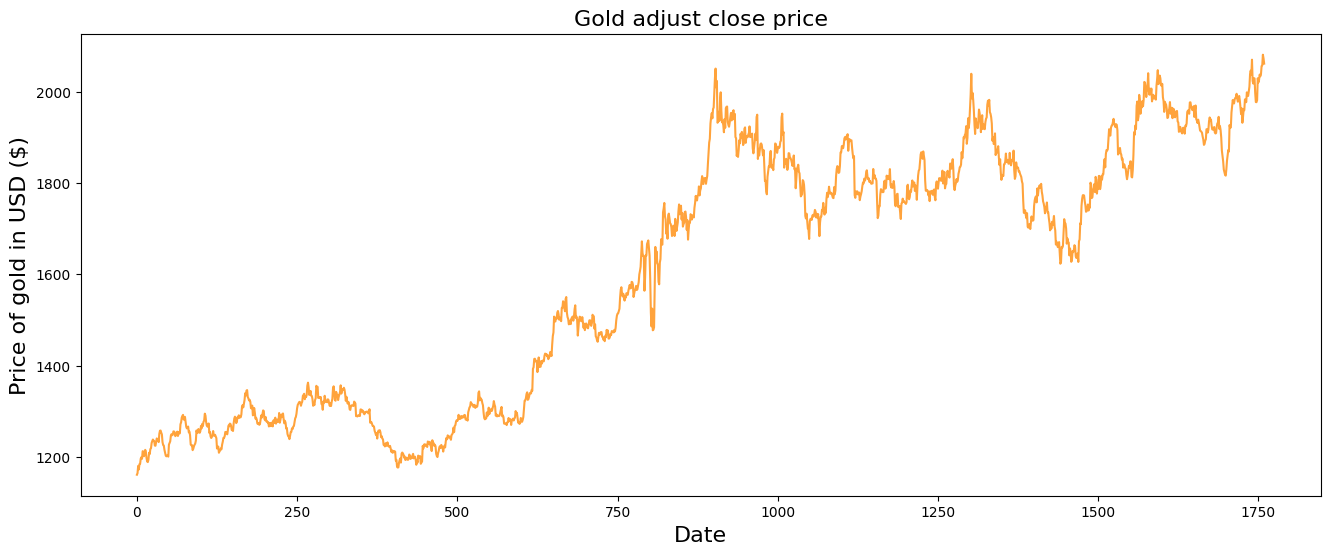

In [13]:
data = df.filter(['Adj Close'])
train = data[:training_data_len]
valid = data[len(y):]
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Gold adjust close price', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price of gold in USD ($)', fontsize=16)
plt.plot(df['Adj Close'], color = "#FFA33C")
plt.plot(valid[['Adj Close']])
plt.show()

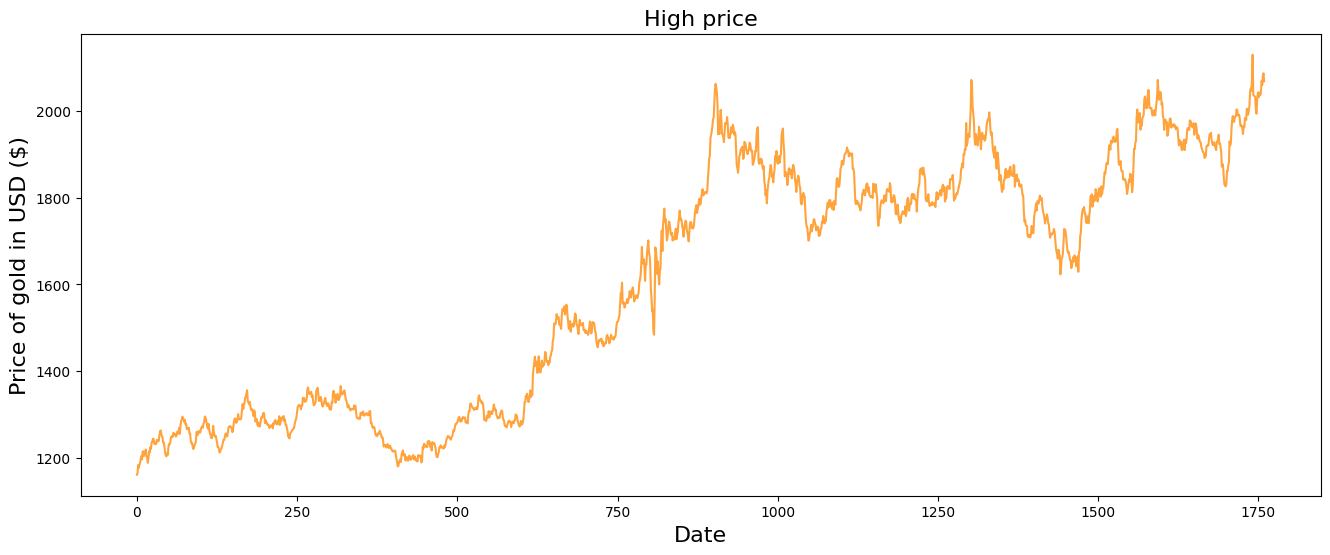

In [14]:
data = df.filter(['High'])
train = data[:training_data_len]
valid = data[len(y):]
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('High price', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price of gold in USD ($)', fontsize=16)
plt.plot(df['High'], color = "#FFA33C")
plt.plot(valid[['High']])
plt.show()

### Create the training data set

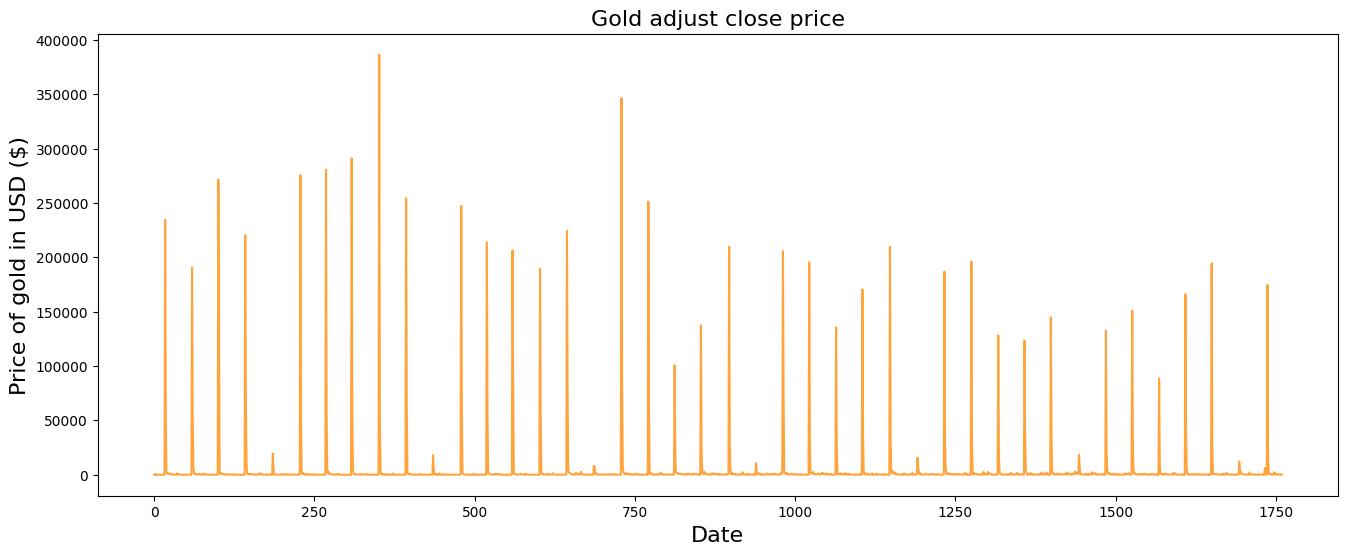

In [15]:
data = df.filter(['Volume'])
train = data[:training_data_len]
valid = data[len(y):]
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Gold adjust close price', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price of gold in USD ($)', fontsize=16)
plt.plot(df['Volume'], color = "#FFA33C")
plt.plot(valid[['Volume']])
plt.show()

In [16]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
print(f'Train data length: {len(train_data)}')

# Split the data into X_train and y_train data sets
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60 + 1:
        print(X_train, "\n")
        print(y_train)

Train data length: 1232
[array([-0.98829304, -0.98212183, -0.95326276, -0.96742   , -0.9463655 ,
       -0.94509505, -0.92440347, -0.91841373, -0.92494786, -0.89463666,
       -0.8959071 , -0.91478364, -0.90861243, -0.88919152, -0.89772215,
       -0.92131776, -0.93547522, -0.93801633, -0.92875963, -0.90080786,
       -0.906253  , -0.88610603, -0.88283886, -0.86196582, -0.85434271,
       -0.8481715 , -0.85270912, -0.85397957, -0.87213003, -0.87303756,
       -0.85888033, -0.84381535, -0.8481715 , -0.84835296, -0.85833572,
       -0.82530196, -0.81314101, -0.81223349, -0.8209458 , -0.82766139,
       -0.85851718, -0.87013353, -0.87194857, -0.88901006, -0.90098932,
       -0.91206107, -0.91514678, -0.91206107, -0.91296859, -0.91623576,
       -0.86831848, -0.86232874, -0.85543169, -0.83274361, -0.82693532,
       -0.83129148, -0.82893205, -0.81586358, -0.81604504, -0.81949367])] 

[-0.8347401128466414]
[array([-0.98829304, -0.98212183, -0.95326276, -0.96742   , -0.9463655 ,
       -0.94

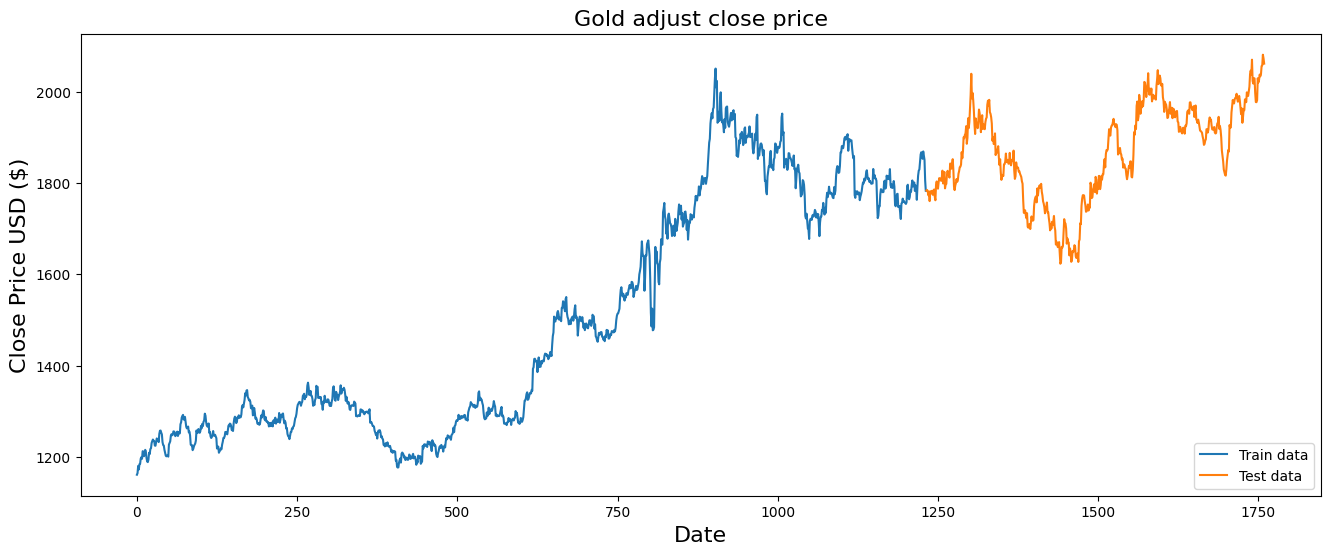

In [17]:
data = df.filter(['Adj Close'])
train = data[:training_data_len]
valid = data[training_data_len:]
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Gold adjust close price', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=16)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close']])
plt.legend(['Train data', 'Test data', 'Predictions'], loc = 'lower right')
plt.show()

In [18]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [19]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(f'X_train shape: {X_train.shape}')

X_train shape: (1172, 60, 1)


In [20]:
def create_lstm_model(X_train, y_train):
  from keras.models import Sequential
  from keras.layers import Dense, LSTM

  model = Sequential()

  model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
  model.add(LSTM(64, return_sequences=False))
  model.add(Dense(25))
  model.add(Dense(1))

  model.compile(optimizer='adam', loss='mean_squared_error')

  model.fit(X_train, y_train, batch_size=1, epochs=1)
  return model

model = create_lstm_model(X_train, y_train)

1172/1172 [==============================] - 24s 19ms/step - loss: 0.0048


### Creating the testing dataset

In [21]:
test_data = scaled_data[training_data_len - 60:, :]
print(len(test_data))
# Create the data sets x_test and y_test
X_test = []
y_test = y[training_data_len:, :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i - 60:i, 0])

588


In [22]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### Predict the model with X_test

In [23]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
predictions[0:10]

17/17 [==============================] - 1s 24ms/step


array([[1838.9795],
       [1822.2714],
       [1808.8997],
       [1799.1663],
       [1791.5739],
       [1787.7863],
       [1783.0431],
       [1782.2458],
       [1782.7721],
       [1784.6669]], dtype=float32)

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

rmse = np.sqrt(mean_squared_error(y_test, predictions))
mape = mean_absolute_percentage_error(y_test, predictions)
Accuracy = (1 - mape) * 100

print(f'RMSE score of the model: {rmse}')
print(f'MAPE score of the model: {mape}')
print(f'Accuracy percentage of the model: {Accuracy}')

RMSE score of the model: 24.933894752945992
MAPE score of the model: 0.010609057873598858
Accuracy percentage of the model: 98.93909421264011


/var/folders/wf/__zsb7rx0rzb4xn2c3y31md40000gn/T/ipykernel_40066/2914741146.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


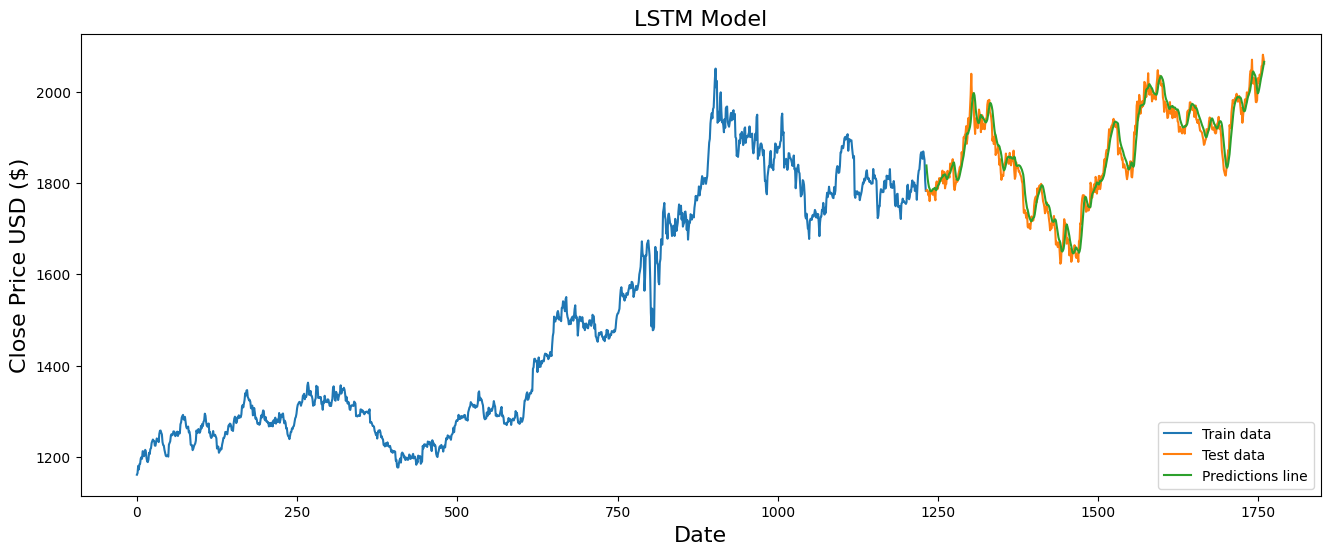

In [25]:
data = df.filter(['Adj Close'])
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=16)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train data', 'Test data', 'Predictions line'], loc='lower right')
plt.show()

In [26]:
valid.head(10)

,Adj Close,Predictions
1232,1784.099976,1838.979492
1233,1785.300049,1822.271362
1234,1782.300049,1808.899658
1235,1773.599976,1799.166260
1236,1781.599976,1791.573853
1237,1760.699951,1787.786255
1238,1782.000000,1783.043091
1239,1777.500000,1782.245850
1240,1782.599976,1782.772095
1241,1783.400024,1784.666870
